<a href="https://colab.research.google.com/github/felipelpsdev/der/blob/main/calculo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite a expressão da função em termos de 'x': x**2 +3
A derivada da função em termos de x é: 2*x
Digite o valor de x para o ponto P: 3


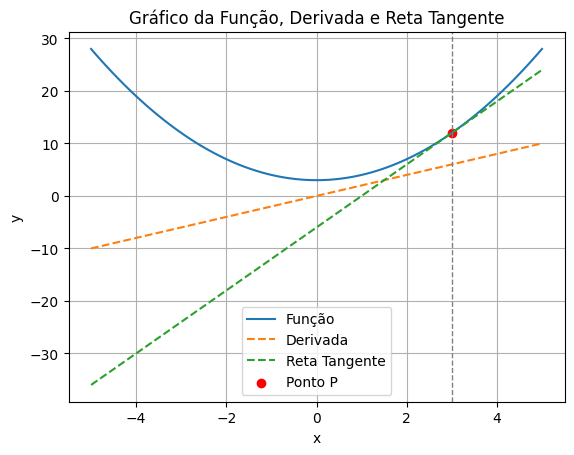

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify, Eq, solve

def obter_funcao():
    x = symbols('x')
    expressao = input("Digite a expressão da função em termos de 'x': ")
    try:
        funcao = lambdify(x, expressao, 'numpy')
        derivada = diff(expressao, x)
        derivada_funcao = lambdify(x, derivada, 'numpy')
        print(f"A derivada da função em termos de x é: {derivada}")
        return funcao, derivada_funcao
    except Exception as e:
        print(f"Erro ao processar a expressão: {e}")
        return None, None

funcao, derivada = obter_funcao()

def reta_tangente(funcao, derivada, x_ponto):
    y_ponto = funcao(x_ponto)
    derivada_ponto = derivada(x_ponto)
    return lambda x: derivada_ponto * (x - x_ponto) + y_ponto

def plotar_grafico(funcao, derivada, reta_tangente, x_ponto):
    x = np.linspace(-5, 5, 100)
    y = funcao(x)
    y_derivada = derivada(x)
    y_tangente = reta_tangente(x)
    plt.plot(x, y, label='Função')
    plt.plot(x, y_derivada, label='Derivada', linestyle='--')
    plt.plot(x, y_tangente, label='Reta Tangente', linestyle='--')
    plt.scatter(x_ponto, funcao(x_ponto), color='red', marker='o', label='Ponto P')
    plt.legend()
    plt.grid(True)
    plt.axvline(x=x_ponto, color='gray', linestyle='--', linewidth=1)
    plt.title('Gráfico da Função, Derivada e Reta Tangente')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

ponto_especifico = float(input("Digite o valor de x para o ponto P: "))

if funcao and derivada:
  reta_tangente = reta_tangente(funcao, derivada, ponto_especifico)
  plotar_grafico(funcao, derivada,  reta_tangente, ponto_especifico)